In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys, os

In [2]:
#MODEL_LOC = "/home/ubuntu/coq-modeling/models/premise_selection_basic"
MODEL_LOC = "/home/ubuntu/coq-modeling/models/premise_selection_low_temp"
#MODEL_LOC = "/home/ubuntu/coq-modeling/models/premise_selection_supcon"

In [3]:
metrics_loc = os.path.join(MODEL_LOC, "lightning_logs", "version_0", "metrics.csv")
metrics_df = pd.read_csv(metrics_loc)

In [4]:
metrics_df[~pd.isna(metrics_df["eval_loss"])]

,lr-Adam,step,loss,epoch,eval_loss
594,NaN,14875,NaN,0.0,4.379429
1191,NaN,29751,NaN,1.0,4.669829


In [5]:
train_points = metrics_df.loc[~pd.isna(metrics_df["loss"]) &
                              ~pd.isna(metrics_df["step"])]
train_steps = train_points["step"].values
train_losses = train_points["loss"].values

if "eval_loss" in metrics_df.columns:
    eval_points = metrics_df.loc[~pd.isna(metrics_df["eval_loss"]) &
                                ~pd.isna(metrics_df["step"])]
    eval_steps = eval_points["step"].values
    eval_losses = eval_points["eval_loss"].values
else:
    eval_steps = []
    eval_losses = []


In [6]:
train_losses[-3]

1.2178006172180176

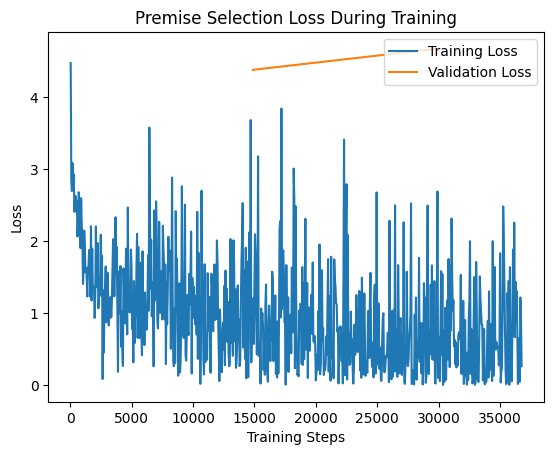

In [7]:
fig, ax = plt.subplots()
ax.plot(train_steps, train_losses, label="Training Loss")
ax.plot(eval_steps, eval_losses, label="Validation Loss")
ax.set_xlabel("Training Steps")
ax.set_ylabel("Loss")
ax.set_title("Premise Selection Loss During Training")
ax.legend()

